# Prepare the environments for this set of experiments

In [9]:
import sys
sys.path.append('../../')
from panav.viz import draw_hybrid

from env_create import load_env_N
import pickle as pkl

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Multi Tunnel
from panav.hybrid import MultiTunnelHG

bloating_r = 0.5

limits = [(-20,20),(-20,20)]
n_tunnel = 4

specs = dict(n_tunnel = n_tunnel, 
            tunnel_width = bloating_r*3.9,
            limits=limits,
            wallthickness = 5.0,
            bloating_r = bloating_r)

env_name = 'MultiTunnel'
import numpy as np
N_range = np.arange(2,31,2)
# N_range = np.arange(10,21,10)
for N in N_range:
    HG = MultiTunnelHG(**specs,N_agent=N)
    with open(f'envs/{env_name}{N}.pkl','wb') as fp:
        pkl.dump(HG,fp)

from env_create import load_env_N
with open(f'envs/{env_name}.pkl','wb') as fp:
    pkl.dump({'specs':dict(path_to_env=f'envs/{env_name}'),'constructor':load_env_N},fp)

draw_hybrid(HG,
            display_node=False)


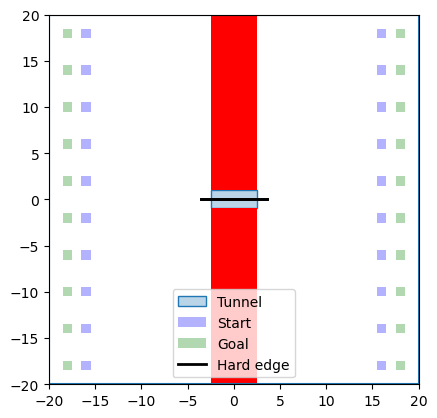

In [11]:
# Single Tunnel
from panav.hybrid import MultiTunnelHG

bloating_r = 0.5

limits = [(-20,20),(-20,20)]
n_tunnel = 1

specs = dict(n_tunnel = n_tunnel, 
            tunnel_width = bloating_r*3.9,
            limits=limits,
            wallthickness = 5.0,
            bloating_r = bloating_r)

env_name = 'SingleTunnel'
import numpy as np
N_range = np.arange(5,21,5)
# N_range = np.arange(10,21,10)
for N in N_range:
    HG = MultiTunnelHG(**specs,N_agent=N)
    with open(f'envs/{env_name}{N}.pkl','wb') as fp:
        pkl.dump(HG,fp)

from env_create import load_env_N
with open(f'envs/{env_name}.pkl','wb') as fp:
    pkl.dump({'specs':dict(path_to_env=f'envs/{env_name}'),'constructor':load_env_N},fp)

draw_hybrid(HG,
            display_node=False)


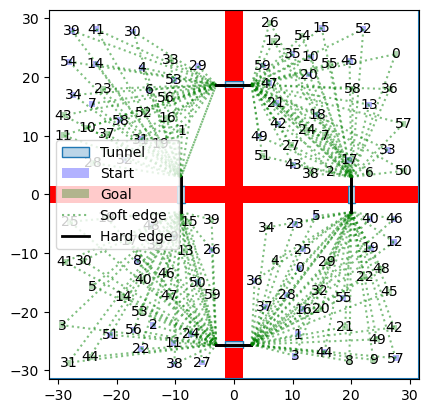

In [20]:
from matplotlib import pyplot as plt
from panav.hybrid import RoomHGBuilder
# Room Simplified


bloating_r = 0.5

specs = dict(n_col = 2, 
        n_row= 2, 
        cell_width= 30,
        cell_height= 30,
        gap_width= 2.5*bloating_r,
        wallthickness = 3.0,
        start_goal_dist= 40,
        bloating_r = bloating_r)


HG = RoomHGBuilder(**specs, N_agent=60)
draw_hybrid(HG,display_soft=True,show_agent_ID=True,display_node=False)



In [21]:
from env_create import load_room
import pickle as pkl

env_info = {'specs':{'path_to_base_room':'./baseRoom.pkl'},'constructor':load_room}
with open(env_info['specs']['path_to_base_room'],'wb') as fp:
    pkl.dump(HG,fp)
env_name = 'Room'
with open('./envs/{}.pkl'.format(env_name),'wb') as f:
    pkl.dump(env_info,f)

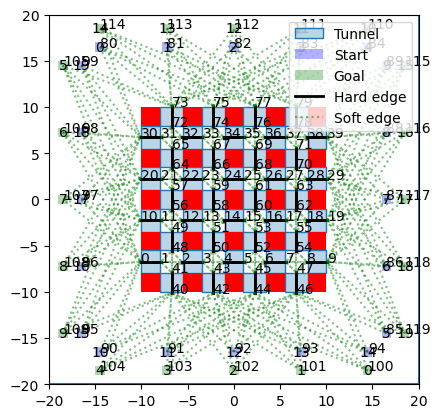

In [14]:
from panav.hybrid import WareHouseHGBuilder
# Warehouse

bloating_r = 0.5
vmax = 1.0



limits = [(-20,20),(-20,20)]

specs = dict(limits = limits, 
                shelf_region_x_limit=[-10,10], 
                shelf_region_y_limit=[-10,10],
                obs_x_margin = 5.0 * bloating_r,
                obs_y_margin = 5.0 * bloating_r,
                n_col = 5, n_row = 5 , 

                corner_padding_x=5,corner_padding_y=5,
                bloating_r = bloating_r,
                tunnel_endpoint_buffer = 0.05)
env_name = 'WareHouse'
import numpy as np

N_range = np.arange(5,21,5)
for N in N_range:
    HG = WareHouseHGBuilder(**specs,N_agent=N)
    with open(f'envs/{env_name}{N}.pkl','wb') as fp:
        pkl.dump(HG,fp)

from env_create import load_env_N
with open(f'envs/{env_name}.pkl','wb') as fp:
    pkl.dump({'specs':dict(path_to_env=f'envs/{env_name}'),'constructor':load_env_N},fp)


draw_hybrid(HG,show_agent_ID=True,display_node=True,display_soft=True)

In [15]:
from env_create import load_env_N
with open(f'envs/{env_name}.pkl','wb') as fp:
    pkl.dump({'specs':dict(path_to_env=f'envs/{env_name}'),'constructor':load_env_N},fp)
